# Project: Investigate TMDb Movies data set

# Research Question
1. What are the most popular genres from year to year?
2. What types of properties are associated with high income films?
3. What are the most popular films from one year to the next?

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

Data wrangling

load the data

In [6]:
df = pd.read_csv('tmdb-movies.csv')

In [8]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
df = pd.read_csv('tmdb-movies.csv')

In [10]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [13]:
import datetime as dt # for convering to date time object
df['release_date'] = df['release_date'].apply(lambda x: dt.datetime.strptime(x, "%m/%d/%y"))

In [14]:
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [15]:
df['release_date'].tail()

10861   2066-06-15
10862   2066-12-21
10863   2066-01-01
10864   2066-11-02
10865   2066-11-15
Name: release_date, dtype: datetime64[ns]

May be there is a problem while getting the value of year for some datetime objects. let's see the year which is converted incorectly

the range of year was  of 1960-2015(both inclusive) but 2066 is showing in above code cell.

let's check after conversion

In [16]:
years = []
for _ in df['release_date']:
    years.append(_.year)
print(list(set(years)))

[2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


No logical reason for this failure, but the years from 1969 to 1979 are historically known as the Python years. I believe that this may be the main reason why the years before 1969 were translated into 21st century years instead of the correct years (like 68 may be interpreted by Python as 2068 instead of 1968). just this is how i can explain this error.

Fixing the year values for 2060-2068 ( both included ) by moving back 100 years:

In [17]:
d_100 = []
years = 100
days_per_year = 365.24

In [18]:
for d in df['release_date']:
    if d.year >=2060:
        #shifting back 100 years 
        tdelta = dt.timedelta(days = (years * days_per_year))
        # corrected date
        d-=tdelta
        d_100.append(d)
    else:
        #as it is
        d_100.append(d)

We do not move the years directly by -100 at once since the year parameter is not available in the dt.timedelta() method.

We are now replacing the original release_date column (which was of type string) with the list d_100 (which is the corrected release_date).

In [19]:
df['release_date'] = d_100


Checking

In [20]:
d = []
for _ in df['release_date']:
    d.append(_.year)
print(list(set(d)))

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


# Removing undesired columns and handling missing data
Checking important column for our analysis

In [18]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [21]:
len(df['id']), len(df['imdb_id']), df.shape[0]

(10865, 10865, 10865)

As the duplicates were removed in the first part of the analysis, the columns ['id', 'imdb_id'] are not relevant for this analysis. These values are single for each row, so it is better to use the row index instead of these columns.

In [22]:
df.drop(['id', 'imdb_id'], axis = 1, inplace = True)

Let's investigate if the columns ['overview', 'original_title', 'homepage', 'tagline', 'production_companies', 'keywords'] can be classed as categorical data or not.

In [23]:
test_col = ['overview', 'original_title', 'homepage', 'tagline', 'production_companies', 'keywords'] # 6 columns
new_dict = {}
for column in df:
    if column in test_col:
        new_dict[column] = df[column].nunique()
print(new_dict)

{'original_title': 10571, 'homepage': 2896, 'tagline': 7997, 'keywords': 8804, 'overview': 10847, 'production_companies': 7445}


Levels of these 6 columns are very big. If levels for a certain column would have been around 10 then it is ok to consider that column as a categorical variable and faceting could be done based on that categorical column.

But here, levels are 10571, 2896, 7997, 8804, 10847, 7445. Number of rows(10865) are around this much level. Faceting will be inconvenient.

So, removing these columns, too, will not affect the result.

In [24]:
df.drop(['overview', 'original_title', 'homepage', 'tagline', 'production_companies', 'keywords'], axis = 1, inplace = True)


Checking and handling missing data.

In [25]:
df.isnull().any().sum()

3

3 columns are missing values.

Checking the incomplete columns:

In [26]:
df.isnull().any()

popularity      False
budget          False
revenue         False
cast             True
director         True
runtime         False
genres           True
release_date    False
vote_count      False
vote_average    False
release_year    False
budget_adj      False
revenue_adj     False
dtype: bool

These column 'cast', 'director' and 'genres' are missing values. Let's see number of missing values for each of these columns to decide whether it is ok to drop them from dataframe.

Creating a subset of df which has only incomplete rows:

In [27]:
null_data = df[df.isnull().any(axis = 1)]
null_data.shape[0]

134

In [28]:
round(100*null_data.shape[0]/df.shape[0], 2)

1.23

There are only 134 incomplete rows in aggregate. That's just 1.2 per cent of df. Now, let's see incomplete rows count for each column.

In [29]:
miss_count = {}
for column in null_data:
    miss_count[column] = sum(pd.isnull(null_data[column]))

In [30]:
miss_count

{'popularity': 0,
 'budget': 0,
 'revenue': 0,
 'cast': 76,
 'director': 44,
 'runtime': 0,
 'genres': 23,
 'release_date': 0,
 'vote_count': 0,
 'vote_average': 0,
 'release_year': 0,
 'budget_adj': 0,
 'revenue_adj': 0}

In [31]:
76+44+23, round(100*(76+44+23)/df.shape[0], 2) # missing counts for columns: cast, director and genres

(143, 1.32)

In [32]:
df.dropna(subset=['cast', 'director', 'genres'], inplace = True)

In [33]:
miss_count = {}
for column in df:
    miss_count[column] = sum(pd.isnull(df[column]))

In [34]:
miss_count

{'popularity': 0,
 'budget': 0,
 'revenue': 0,
 'cast': 0,
 'director': 0,
 'runtime': 0,
 'genres': 0,
 'release_date': 0,
 'vote_count': 0,
 'vote_average': 0,
 'release_year': 0,
 'budget_adj': 0,
 'revenue_adj': 0}

# Exploratory Data Analysis
Research Question 1: What are the most popular genres from year to year?
I will first sort my data by release_date column for year to year analysis.

Sorting by date:

In [35]:
df.sort_values(by = ['release_date'], inplace = True)
df.head(3)

,popularity,budget,revenue,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10152,0.333643,0,0,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,Terence Fisher,85,Horror,1960-01-02,19,6.6,1960,0.0,0.0
10150,0.421043,0,0,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,John Huston,125,Action|Drama|Western,1960-01-02,17,4.9,1960,0.0,0.0
10162,0.194948,0,0,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,Lewis Gilbert,97,Action|Drama|Foreign|History|War,1960-02-12,12,4.9,1960,0.0,0.0


There are too many columns to deal with. We want to know which genres popular in this time period 1960-2015.
For this part of EDA(question 1), I will remove columns that I am not interested in using.

In [36]:
df.columns


Index(['popularity', 'budget', 'revenue', 'cast', 'director', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [37]:
df_r1 = df.drop(['popularity', 'budget', 'revenue', 'cast', 'director', 'runtime', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj'], axis = 1)
df_r1.head(3)

,genres,release_date,release_year
10152,Horror,1960-01-02,1960
10150,Action|Drama|Western,1960-01-02,1960
10162,Action|Drama|Foreign|History|War,1960-02-12,1960


You might be thinking why I removed popularity and budget-revenue columns, specifically popularity.That's because they are properties of each movie, not each genre. We cannot infer the popularity of a genre by popularity of the movie in which it is there. That's because every movie is a mix of different type of genres and there is not a correct way to distribute the popularity of a movie among its constitute genres.

Since we are analysing genres trends from year to year, we can further remove release_date column particularly for this research question because we have release_year column for that.

Removing release_date column:

In [38]:
df_r1.drop(['release_date'], axis = 1, inplace = True)
df_r1.head(3)

,genres,release_year
10152,Horror,1960
10150,Action|Drama|Western,1960
10162,Action|Drama|Foreign|History|War,1960


We can see that Action and Drama are repeated above.
This means each movie contains genres separated by pipe operator "|".
Let's look at of genres column:

In [39]:
df_r1['genres']

10152                               Horror
10150                 Action|Drama|Western
10162     Action|Drama|Foreign|History|War
10166                               Comedy
10156                       Action|Western
                       ...                
540                          Mystery|Drama
569                           Drama|Horror
144         Animation|Comedy|Drama|Romance
190      Animation|Comedy|Family|Adventure
322                  Drama|Horror|Thriller
Name: genres, Length: 10731, dtype: object

Creating a list of unique genres from 1960-2015:

In [40]:
def unique(col):
    """
    Takes input as a dataframe column and output a list containing
    unique values from that column.
    """
    
    # pandas series to list
    entries = list(col)
    
    # handling "|" separator and removing duplicates
    collect = [] #this will contain all the unique genres
    
    for entry in entries:
        for _ in entry.split("|"):
            if _ not in collect:
                collect.append(_)
    return(collect)

In [41]:
unique(df_r1['genres'])

['Horror',
 'Action',
 'Drama',
 'Western',
 'Foreign',
 'History',
 'War',
 'Comedy',
 'Thriller',
 'Crime',
 'Family',
 'Romance',
 'Science Fiction',
 'Adventure',
 'Fantasy',
 'Music',
 'Mystery',
 'Animation',
 'TV Movie',
 'Documentary']

In [42]:
len(unique(df_r1['genres'])), df_r1.shape[0]

(20, 10731)

The o/p in above text cell shows that all the entries in df_r1['genres'] has 10731 entries which are different combinations of elements from unique(df_r1['genres']). Now let's calculate occurrence of each genre for corresponding year.

Creating a list of all the years:

In [43]:
year = df_r1['release_year'].unique()


In [44]:
year

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

I will start by creating an empty dictionary new_df.

In [45]:
new_df = {key:[] for key in unique(df_r1['genres'])}
new_df

{'Horror': [],
 'Action': [],
 'Drama': [],
 'Western': [],
 'Foreign': [],
 'History': [],
 'War': [],
 'Comedy': [],
 'Thriller': [],
 'Crime': [],
 'Family': [],
 'Romance': [],
 'Science Fiction': [],
 'Adventure': [],
 'Fantasy': [],
 'Music': [],
 'Mystery': [],
 'Animation': [],
 'TV Movie': [],
 'Documentary': []}

In [46]:
new_df['year'] = year
new_df

{'Horror': [],
 'Action': [],
 'Drama': [],
 'Western': [],
 'Foreign': [],
 'History': [],
 'War': [],
 'Comedy': [],
 'Thriller': [],
 'Crime': [],
 'Family': [],
 'Romance': [],
 'Science Fiction': [],
 'Adventure': [],
 'Fantasy': [],
 'Music': [],
 'Mystery': [],
 'Animation': [],
 'TV Movie': [],
 'Documentary': [],
 'year': array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
        1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
        1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
        1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
        2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
        2015], dtype=int64)}

In [47]:
for y in year: # to get genre count for each year
    
    #subsetting for corresponding year
    y_df_r1 = df_r1[df_r1['release_year'] == y]
    
    # converting pandas series to column
    genres_i1 = list(y_df_r1['genres'])  
    genres_f1 = [] # this will contain all the genres that we see for a given year(with repetition and "|" separator)
    
    for genre in genres_i1: # for splitting every entry in y_df[genres] with separator as "|" 
        for i in genre.split("|"):
            genres_f1.append(i)

    new_list = Counter(genres_f1) # occurrence of each genre in a year
    for genre in unique(df_r1['genres']): #this will create occurrence of each genre in a year
        if genre not in genres_f1:
            new_df[genre].append(0)
        else:
            new_df[genre].append(new_list[genre])

converting this dictionary to data frame:

In [48]:
new_df = pd.DataFrame(new_df, index = new_df['year'])
new_df.head()


,Horror,Action,Drama,Western,Foreign,History,War,Comedy,Thriller,Crime,...,Romance,Science Fiction,Adventure,Fantasy,Music,Mystery,Animation,TV Movie,Documentary,year
1960,7,8,13,6,1,5,2,8,6,2,...,6,3,5,2,1,0,0,0,0,1960
1961,3,7,16,3,1,3,2,10,0,2,...,7,4,6,2,2,1,1,0,0,1961
1962,5,8,21,3,1,4,3,5,7,3,...,5,2,7,1,1,4,0,0,0,1962
1963,9,4,13,2,2,4,1,13,10,4,...,8,2,7,2,0,6,1,0,0,1963
1964,6,5,20,1,1,3,3,16,9,10,...,9,4,5,4,5,4,2,0,0,1964


In [49]:
new_df.columns

Index(['Horror', 'Action', 'Drama', 'Western', 'Foreign', 'History', 'War',
       'Comedy', 'Thriller', 'Crime', 'Family', 'Romance', 'Science Fiction',
       'Adventure', 'Fantasy', 'Music', 'Mystery', 'Animation', 'TV Movie',
       'Documentary', 'year'],
      dtype='object')

In [50]:
del(new_df['year'])


In [51]:
new_df.columns


Index(['Horror', 'Action', 'Drama', 'Western', 'Foreign', 'History', 'War',
       'Comedy', 'Thriller', 'Crime', 'Family', 'Romance', 'Science Fiction',
       'Adventure', 'Fantasy', 'Music', 'Mystery', 'Animation', 'TV Movie',
       'Documentary'],
      dtype='object')

In [52]:
new_df.shape
# new_df.head()


(56, 20)

In [53]:
new_df.head()


,Horror,Action,Drama,Western,Foreign,History,War,Comedy,Thriller,Crime,Family,Romance,Science Fiction,Adventure,Fantasy,Music,Mystery,Animation,TV Movie,Documentary
1960,7,8,13,6,1,5,2,8,6,2,3,6,3,5,2,1,0,0,0,0
1961,3,7,16,3,1,3,2,10,0,2,5,7,4,6,2,2,1,1,0,0
1962,5,8,21,3,1,4,3,5,7,3,2,5,2,7,1,1,4,0,0,0
1963,9,4,13,2,2,4,1,13,10,4,3,8,2,7,2,0,6,1,0,0
1964,6,5,20,1,1,3,3,16,9,10,4,9,4,5,4,5,4,2,0,0


# What this dataframe shows?

Let's see first row. If there are n number of movies released in 1960, then entries corresponding to 1960 shows how many times
each genre appeared in 1960.
Let's see this numerically:

In [54]:
total_occ = new_df.loc[1960].sum()
total_occ

78

In [56]:
action_occ = new_df.loc[1960,'Action']
action_occ

8

Action appeared 8 times in 1960.



In [57]:
action_part = 100*action_occ/total_occ
action_part

10.256410256410257

Portion of occurrences showing Action: 10.256
Similarly calculating proportions for all genres in this new_df and creating another data frame new_df1 for analyzing year by year genre trends.

In [59]:
new_df1 = {key:[] for key in unique(df_r1['genres'])}
new_df1

{'Horror': [],
 'Action': [],
 'Drama': [],
 'Western': [],
 'Foreign': [],
 'History': [],
 'War': [],
 'Comedy': [],
 'Thriller': [],
 'Crime': [],
 'Family': [],
 'Romance': [],
 'Science Fiction': [],
 'Adventure': [],
 'Fantasy': [],
 'Music': [],
 'Mystery': [],
 'Animation': [],
 'TV Movie': [],
 'Documentary': []}

In [60]:
new_df1['year'] = year
new_df1

{'Horror': [],
 'Action': [],
 'Drama': [],
 'Western': [],
 'Foreign': [],
 'History': [],
 'War': [],
 'Comedy': [],
 'Thriller': [],
 'Crime': [],
 'Family': [],
 'Romance': [],
 'Science Fiction': [],
 'Adventure': [],
 'Fantasy': [],
 'Music': [],
 'Mystery': [],
 'Animation': [],
 'TV Movie': [],
 'Documentary': [],
 'year': array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
        1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
        1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
        1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
        2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
        2015], dtype=int64)}

In [61]:
for index,row in new_df.iterrows():
    for genre in list(new_df.columns):
        new_df1[genre].append((100*row[genre]/sum(row)))

Converting to data frame:

In [62]:
new_df1 = pd.DataFrame(new_df1)
new_df1.head(5)

,Horror,Action,Drama,Western,Foreign,History,War,Comedy,Thriller,Crime,...,Romance,Science Fiction,Adventure,Fantasy,Music,Mystery,Animation,TV Movie,Documentary,year
0,8.974359,10.256410,16.666667,7.692308,1.282051,6.410256,2.564103,10.256410,7.692308,2.564103,...,7.692308,3.846154,6.410256,2.564103,1.282051,0.000000,0.000000,0.0,0.0,1960
1,4.000000,9.333333,21.333333,4.000000,1.333333,4.000000,2.666667,13.333333,0.000000,2.666667,...,9.333333,5.333333,8.000000,2.666667,2.666667,1.333333,1.333333,0.0,0.0,1961
2,6.097561,9.756098,25.609756,3.658537,1.219512,4.878049,3.658537,6.097561,8.536585,3.658537,...,6.097561,2.439024,8.536585,1.219512,1.219512,4.878049,0.000000,0.0,0.0,1962
3,9.890110,4.395604,14.285714,2.197802,2.197802,4.395604,1.098901,14.285714,10.989011,4.395604,...,8.791209,2.197802,7.692308,2.197802,0.000000,6.593407,1.098901,0.0,0.0,1963
4,5.405405,4.504505,18.018018,0.900901,0.900901,2.702703,2.702703,14.414414,8.108108,9.009009,...,8.108108,3.603604,4.504505,3.603604,4.504505,3.603604,1.801802,0.0,0.0,1964


Moving new_df['year'] to first place:

In [63]:
cols = new_df1.columns.tolist()
cols = cols[-1:] + cols[:-1]
new_df1 = new_df1[cols]
new_df1.columns

Index(['year', 'Horror', 'Action', 'Drama', 'Western', 'Foreign', 'History',
       'War', 'Comedy', 'Thriller', 'Crime', 'Family', 'Romance',
       'Science Fiction', 'Adventure', 'Fantasy', 'Music', 'Mystery',
       'Animation', 'TV Movie', 'Documentary'],
      dtype='object')

In [64]:
new_df1.head()


,year,Horror,Action,Drama,Western,Foreign,History,War,Comedy,Thriller,...,Family,Romance,Science Fiction,Adventure,Fantasy,Music,Mystery,Animation,TV Movie,Documentary
0,1960,8.974359,10.256410,16.666667,7.692308,1.282051,6.410256,2.564103,10.256410,7.692308,...,3.846154,7.692308,3.846154,6.410256,2.564103,1.282051,0.000000,0.000000,0.0,0.0
1,1961,4.000000,9.333333,21.333333,4.000000,1.333333,4.000000,2.666667,13.333333,0.000000,...,6.666667,9.333333,5.333333,8.000000,2.666667,2.666667,1.333333,1.333333,0.0,0.0
2,1962,6.097561,9.756098,25.609756,3.658537,1.219512,4.878049,3.658537,6.097561,8.536585,...,2.439024,6.097561,2.439024,8.536585,1.219512,1.219512,4.878049,0.000000,0.0,0.0
3,1963,9.890110,4.395604,14.285714,2.197802,2.197802,4.395604,1.098901,14.285714,10.989011,...,3.296703,8.791209,2.197802,7.692308,2.197802,0.000000,6.593407,1.098901,0.0,0.0
4,1964,5.405405,4.504505,18.018018,0.900901,0.900901,2.702703,2.702703,14.414414,8.108108,...,3.603604,8.108108,3.603604,4.504505,3.603604,4.504505,3.603604,1.801802,0.0,0.0


Now visualising trends for each genre. I will use the same function to get a list of unique genres:

Text(0, 0.5, 'genre')

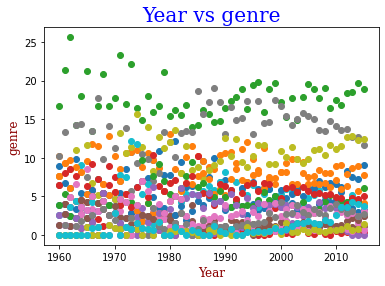

In [141]:
for genre in unique(df['genres']):
    plt.scatter(y = new_df1[genre], x = new_df1['year']);
#     plt.legend()

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':12}

plt.title("Year vs genre", fontdict = font1)
plt.xlabel("Year", fontdict = font2)
plt.ylabel("genre", fontdict = font2)


This graph looks very messy. Let's see the mean value of occurrence for each genre:

In [66]:
mean = {}
for _ in new_df1.columns[1:]: # coz firt row is year column
    mean[_] = np.mean(new_df1[_])
mean

{'Horror': 6.1818010746638175,
 'Action': 9.182841947309699,
 'Drama': 17.619061813680453,
 'Western': 1.5570791594773028,
 'Foreign': 0.6238363396628035,
 'History': 1.6829865578705407,
 'War': 1.5115212996926917,
 'Comedy': 13.365996728567213,
 'Thriller': 10.042593415974055,
 'Crime': 5.355598567149161,
 'Family': 4.236932155904937,
 'Romance': 6.29171690215945,
 'Science Fiction': 4.796821514598795,
 'Adventure': 5.977938938496693,
 'Fantasy': 3.2695122162267056,
 'Music': 1.6829654289355405,
 'Mystery': 3.274973642951846,
 'Animation': 1.8724954892280656,
 'TV Movie': 0.4716258804660151,
 'Documentary': 1.0017009269842234}

I am dropping all the genres except the top 5 ones.

In [67]:
top_5 = []
for _ in new_df1.columns[1:]:
    top_5.append(np.mean(new_df1[_]))
    top_5.sort(reverse = True)
top_5[:5]

[17.619061813680453,
 13.365996728567213,
 10.042593415974055,
 9.182841947309699,
 6.29171690215945]

These top 5 mean values are for Drama, Comedy, Thriller, Action, Romance. Now, visualising trends only for these genres:

Text(0, 0.5, 'genre')

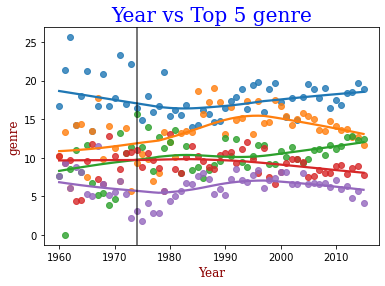

In [140]:
import seaborn as sns
g = ['Drama','Comedy','Thriller','Action','Romance']
for genre in g:
    plot = sns.regplot(y = new_df1[genre], x = new_df1['year'], lowess = True);
plot.set_ylabel("");
plot.axvline(x = 1974, color = 'black', alpha = 0.7);

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':12}

plt.title("Year vs Top 5 genre", fontdict = font1)
plt.xlabel("Year", fontdict = font2)
plt.ylabel("genre", fontdict = font2)

# Question 2: What types of properties are associated with high income films?

In [70]:
df.head()


,popularity,budget,revenue,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10152,0.333643,0,0,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,Terence Fisher,85,Horror,1960-01-02,19,6.6,1960,0.0,0.0
10150,0.421043,0,0,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,John Huston,125,Action|Drama|Western,1960-01-02,17,4.9,1960,0.0,0.0
10162,0.194948,0,0,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,Lewis Gilbert,97,Action|Drama|Foreign|History|War,1960-02-12,12,4.9,1960,0.0,0.0
10166,0.136525,0,0,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,Gerald Thomas,86,Comedy,1960-02-23,10,6.0,1960,0.0,0.0
10156,0.267118,0,0,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,Budd Boetticher,73,Action|Western,1960-03-02,12,6.5,1960,0.0,0.0


Taking inflation into account. Removing budget and revenue columns:

In [71]:
df.drop(['revenue', 'budget'], axis = 1, inplace = True)


In [73]:
df.head()


,popularity,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10152,0.333643,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,Terence Fisher,85,Horror,1960-01-02,19,6.6,1960,0.0,0.0
10150,0.421043,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,John Huston,125,Action|Drama|Western,1960-01-02,17,4.9,1960,0.0,0.0
10162,0.194948,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,Lewis Gilbert,97,Action|Drama|Foreign|History|War,1960-02-12,12,4.9,1960,0.0,0.0
10166,0.136525,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,Gerald Thomas,86,Comedy,1960-02-23,10,6.0,1960,0.0,0.0
10156,0.267118,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,Budd Boetticher,73,Action|Western,1960-03-02,12,6.5,1960,0.0,0.0


Text(0.5, 1.0, 'Revenue histogram')

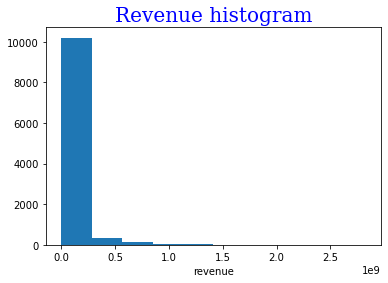

In [129]:
plt.hist(x = df['revenue_adj']);
plt.xlabel('revenue');
font1 = {'family':'serif','color':'blue','size':20}
# font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Revenue histogram", fontdict = font1)


This is skewed distribution. Let's see the summary of revenue_adj column:

In [73]:
df['revenue_adj'].describe()


count    1.073100e+04
mean     5.200623e+07
std      1.454252e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.470546e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

Minimum value in revenue_adj is 0. That's why our distribution is skewed. Let's see how many such rows are there.

In [74]:
# minimum value of revenue is 0.
df[df['revenue_adj'] == min(df['revenue_adj'])].shape[0], 100*(df[df['revenue_adj'] == min(df['revenue_adj'])].shape[0])/df.shape[0]

(5888, 54.86907091603765)

5888 movies have no revenue. It is more than 50% of df.This will skew our distribution for revenue_adj column.
In order to correctly know the properties of high revenue movies, it is important to remove movies which have no revenue.

In [75]:
df_r2 = df.query("revenue_adj != 0")


##### Definition of scatter diagram graphs
The scatter diagram graphs pairs of numerical data, with one variable on each axis, to look for a relationship between them. If the variables are correlated, the points will fall along a line or curve.
The better the correlation, the tighter the points will hug the line.

Text(0, 0.5, 'revenue')

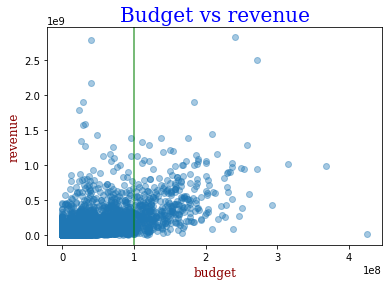

In [131]:
plt.scatter(x = df_r2["budget_adj"], y = df_r2['revenue_adj'],alpha = 0.4);
# plt.xlabel("budget");
# plt.ylabel("revenue");
plt.axvline(x = 100000000, color = 'Green', alpha = 0.7);

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':12}

plt.title("Budget vs revenue", fontdict = font1)
plt.xlabel("budget", fontdict = font2)
plt.ylabel("revenue", fontdict = font2)


from the scatterplot, it is clear that revenue is not strongly dependent on budget of movie. There are few movies which have high revenue. Budget of most of the movies is less than $100m.

Text(0, 0.5, 'revenue_adj')

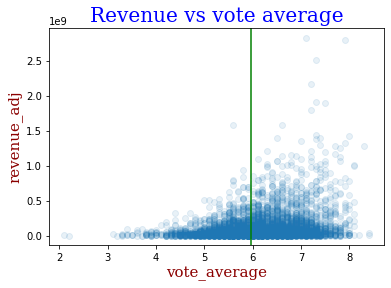

In [126]:
plt.scatter(x = df_r2['vote_average'],y = df_r2['revenue_adj'], alpha = 0.1);
# plt.xlabel("avg_vote");
# plt.ylabel("revenue");
plt.axvline(x = np.mean(df['vote_average']), color = 'Green');
# plt.title("Relation between revenue and voting average")

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Revenue vs vote average", fontdict = font1)
plt.xlabel("vote_average", fontdict = font2)
plt.ylabel("revenue_adj", fontdict = font2)

This graph shows that high revenue movies have voting above average.

In [121]:
# y = df_r2['revenue_adj']
# plt.plot (x, y, alpha = 0.8)
# # plt.xlabel("vote_average")
# # plt.ylabel("revenue_adj")
# plt.axvline(x = np.mean(df['vote_average']), color = 'Green')
# # plt.title("Relation between revenue and voting average")

# font1 = {'family':'serif','color':'blue','size':20}
# font2 = {'family':'serif','color':'darkred','size':15}

# plt.title("Relation between revenue and vote average", fontdict = font1)
# plt.xlabel("vote_average", fontdict = font2)
# plt.ylabel("revenue_adj", fontdict = font2)



Text(0, 0.5, 'revenue')

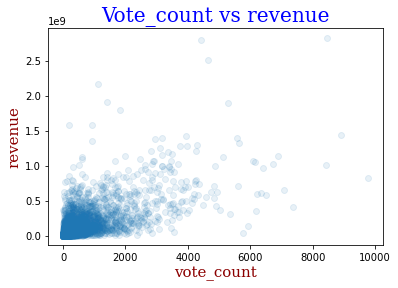

In [127]:
plt.scatter(df_r2["vote_count"], df_r2['revenue_adj'], alpha = 0.1);
# plt.xlabel("vote_count");
# plt.ylabel("revenue");

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Vote_count vs revenue", fontdict = font1)
plt.xlabel("vote_count", fontdict = font2)
plt.ylabel("revenue", fontdict = font2)

There is a positive correlation between revenue and vote_count but not strong enough to make any conclusion.

Text(0, 0.5, 'Revenue')

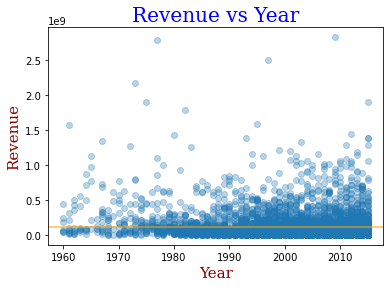

In [124]:
plt.scatter(x = df_r2['release_year'], y = df_r2['revenue_adj'], alpha = 0.3);
# plt.xlabel('year');
# plt.ylabel('revenue');
plt.axhline(y = np.mean(df_r2['revenue_adj']), color = 'Orange', alpha = 0.7)
plt.title('Revenue vs Year');

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Revenue vs Year", fontdict = font1)
plt.xlabel("Year", fontdict = font2)
plt.ylabel("Revenue", fontdict = font2)


The increasing density of blue color shows that number of high revenue movies has increased from 1960 to 2015. The red line is for mean of revenue_adj column.



# Question 3: What are the most popular films from one year to the next?

In [89]:
df['popularity'].describe()


count    10731.000000
mean         0.652615
std          1.004804
min          0.000188
25%          0.210765
50%          0.387081
75%          0.720889
max         32.985763
Name: popularity, dtype: float64

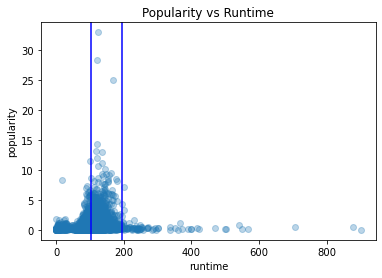

In [91]:
plt.scatter(x = df['runtime'],y = df['popularity'], alpha = 0.3)
plt.axvline(x = df['runtime'].mean(), color = "blue");
plt.axvline(x = np.mean(df['runtime']) + 3*np.std(df['runtime']), color = 'blue')
plt.xlabel("runtime");
plt.ylabel("popularity");
plt.title('Popularity vs Runtime');

In [92]:
np.std(df['runtime'])


30.49245171681272

In [93]:
df['runtime'].mean()


102.46882862734135

Average runtime of movies is around 102 minute. All the popular movies have runtime more than 102 minute. First vertical line is for np.mean(df['runtime']) and second vertical line is for np.mean(df['runtime']) + 3*np.std(df['runtime']).

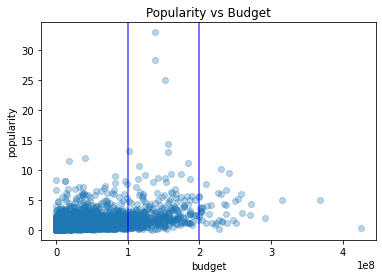

In [94]:
plt.scatter(x = df['budget_adj'], y = df['popularity'], alpha = 0.3);
plt.xlabel('budget');
plt.ylabel('popularity');
plt.title('Popularity vs Budget');
plt.axvline(x = 100000000, color = 'blue', alpha = 0.7);
plt.axvline(x = 200000000, color = 'blue', alpha = 0.7);

Popular movies have budget between $100m and 200m.



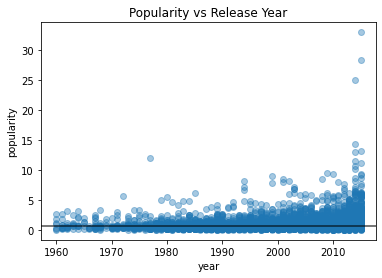

In [96]:
plt.scatter(x = df_r2['release_year'], y = df_r2['popularity'],alpha= 0.4);
plt.xlabel('year');
plt.ylabel('popularity');
plt.title('Popularity vs Release Year');
plt.axhline(y = np.mean(df['popularity']), color = 'black', alpha = 0.7);

Popularity of movies has increased from 1960 to 2015, 2015 showing the highest popularity movies.



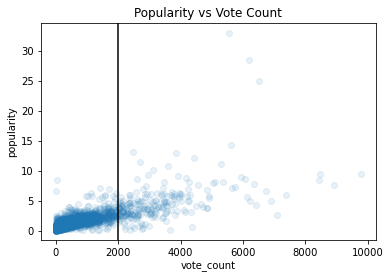

In [98]:
plt.scatter(x = df['vote_count'], y = df['popularity'], alpha = 0.1);
plt.xlabel('vote_count');
plt.ylabel('popularity');
plt.axvline(x = 2000, color = 'black');
plt.title('Popularity vs Vote Count');

bove graph shows that popular movies have high vote count, wheras all the less popular movies have vote count less than 2000. The vertical line shows this trend.

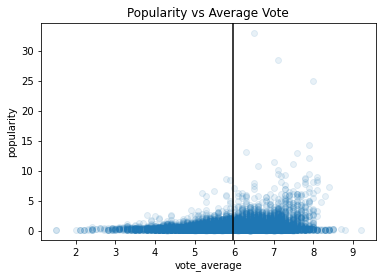

In [128]:
plt.scatter(x = df['vote_average'], y = df['popularity'], alpha = 0.1);
plt.xlabel('vote_average');
plt.ylabel('popularity');
plt.axvline(x = np.mean(df['vote_average']), color = "black");
plt.title('Popularity vs Average Vote');

Popular movies also have above average voting.

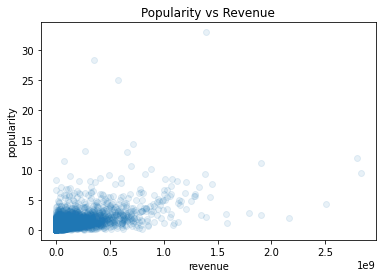

In [101]:
plt.scatter(x = df['revenue_adj'], y = df['popularity'], alpha = 0.1);
plt.xlabel('revenue');
plt.ylabel('popularity');
plt.title('Popularity vs Revenue');

# Conclusions


## Research Question 1


The popular genres from 1960 to 2015 are drama, comedy, thriller, action and romance respectively. Drama and comedy films consistently occupy the top two places, but thriller and action films changed their position around 1974. Since 1974, the popularity of action films has declined. The fifth position is occupied by romantic films.

## Research Question 2
I had to drop half of the entries in the revenue_adj column to see the properties of the high grossing films. There was no relationship between revenue and budget. Most high grossing films have above average votes. As the number of average votes for a film increases, so does its revenue. If we try to fit the curve from the revenue_adj column to the average_votes column, we will get an ascending parabola or exponential.



## Research Question 3

Most favourite films have a duration equal to or greater than the average in the duration column. The vertical lines show this trend. The budget of popular films is between 100 and 200 million dollars, but I have not indicated the exact budget values because it does not equal a statistic in the budget_adj column. The popularity and interest in films has increased from time to time. In the popularity vs. year graph, we can see that 2015 saw the most popular films of all time. The graph of Popularity vs the Average Vote shows that all the popular films have an above average vote.

## Limitation of the study


This analysis was done on student scope to help him to fullfil the requirement of non degree program from udacity and there is a high probabity that this is study will not be put into practice.


In [104]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295